# Project 2 - Ryan Yordanoff

In [562]:
import pickle
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Import absolute abundance data

In [563]:
#Data format:  list of pandas dataframes len = 6.  We are only concerned with data from the index 4 ([4])
abs_data = pickle.load(open('pickle_files/abs_sort_lod_list.pkl', 'rb'))
s_names_data = pickle.load(open('pickle_files/col_names_lod_list.pkl', 'rb'))
abs_data_i4 = abs_data[4]
s_names_data_i4 = s_names_data[4]

# Prepare data

In [564]:
#names found on figure 3B
species_names = ['Enterobacteriaceae(f)', 'Escherichia-Shigella(g)', 'Clostridium sensu stricto 1(g)', 'Enterococcus(g)', 'Romboutsia(g)', 'Aeromonas(g)', 'Bacteroides(g)', 'Lactobacillus(g)', 'Cardiobacterium(g)', 'Aggregatibacter(g)', 'Actinobacillus(g)', 'Ruminococcaceae UCG-014(g)', 'SR1 bacterium oral taxon 875(g)', 'Neisseriaceae(f)', 'Eikenella(g)', 'Pasteurellaceae(f)', 'Prevotella(g)', 'Fusobacterium(g)']

#find ASV in the data from the species names
ASV_dict_raw = (s_names_data_i4['label']).to_dict() #takes the species ASV as key and corresponding name as value Example: {'ASV255': 'Enterobacteriaceae(f)', 'ASV256': 'Halomonas(g)'}
ASV_dict = dict((val,key) for key,val in ASV_dict_raw.items()) #reverses previous dict for easier indexing.  Example: {'Enterobacteriaceae(f)':'ASV255', 'Halomonas(g)':'ASV256'}
ASV_list = [] #list of ASVs for plotting data (ASV are index in pandas dataframe)

for species in species_names:
    ASV_list.append(ASV_dict[species])

#obtain the absolute abundance data for the specified species we want to plot
plot_abs_data = abs_data_i4[ASV_list]

print(f'ASV_list: {ASV_list}')


ASV_list: ['ASV255', 'ASV247', 'ASV81', 'ASV70', 'ASV142', 'ASV219', 'ASV11', 'ASV71', 'ASV243', 'ASV258', 'ASV257', 'ASV163', 'ASV197', 'ASV242', 'ASV239', 'ASV260', 'ASV30', 'ASV191']


In [565]:
#iterates through each ASV and performs spearman correlation.  Creates one long list with all correlation values.
correlation_list = []

for i in ASV_list:
    for j in ASV_list:
        correlation_list.append(stats.spearmanr(plot_abs_data[i],plot_abs_data[j])[0])

#list is then split into even chunks into a list of lists
correlation_list_list = [correlation_list[i:i+len(ASV_list)] for i in range(0,len(correlation_list),len(ASV_list))]

#list of lists is made into a dataframe.  Now our data is ready to plot!
correlation_list_list_df = pd.DataFrame(correlation_list_list)

correlation_list_list_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.000000,0.436819,0.401648,0.340623,0.236730,0.262158,0.092060,0.179363,0.077550,-0.051121,-0.093987,-0.201888,-0.087560,-0.051797,-0.032783,0.024132,-0.111431,0.002365
1,0.436819,1.000000,0.259745,0.380159,0.253664,0.234988,0.114118,0.072228,0.039397,-0.007687,-0.054391,-0.156953,-0.048828,-0.048504,0.010064,-0.061257,-0.070859,0.021473
2,0.401648,0.259745,1.000000,0.140627,0.416596,0.131281,0.067568,0.171187,-0.009901,-0.022994,-0.126441,-0.140354,-0.056853,-0.077442,-0.010729,-0.001730,-0.167580,-0.114834
3,0.340623,0.380159,0.140627,1.000000,0.171622,0.176805,0.106506,0.058197,0.024607,-0.011445,-0.045310,-0.064045,-0.092547,0.012755,-0.070692,0.045660,-0.000043,0.013964
4,0.236730,0.253664,0.416596,0.171622,1.000000,0.410911,0.167740,0.057398,0.083865,0.081444,0.044497,0.023219,0.154181,-0.047226,0.069482,0.069036,-0.026245,-0.066422
5,0.262158,0.234988,0.131281,0.176805,0.410911,1.000000,0.067867,-0.059421,0.065108,0.011868,-0.015765,-0.063730,0.013389,-0.047226,-0.001130,-0.006043,-0.060324,-0.054872
6,0.092060,0.114118,0.067568,0.106506,0.167740,0.067867,1.000000,0.087743,-0.011685,-0.006792,-0.035501,0.009200,-0.052491,-0.000547,-0.053496,-0.064356,-0.035630,-0.106963
7,0.179363,0.072228,0.171187,0.058197,0.057398,-0.059421,0.087743,1.000000,-0.091275,0.001508,-0.207809,-0.253239,-0.171078,-0.032802,-0.119504,-0.080455,-0.114425,-0.148826
8,0.077550,0.039397,-0.009901,0.024607,0.083865,0.065108,-0.011685,-0.091275,1.000000,0.357025,0.304123,0.115956,0.123562,0.251735,0.523311,0.163891,0.124425,0.291172
9,-0.051121,-0.007687,-0.022994,-0.011445,0.081444,0.011868,-0.006792,0.001508,0.357025,1.000000,0.466316,0.237142,0.297732,0.130455,0.531823,0.215451,0.330392,0.334269


# Clustered co-correlation matrix of the top 16 genera (and 2 controls)

[]

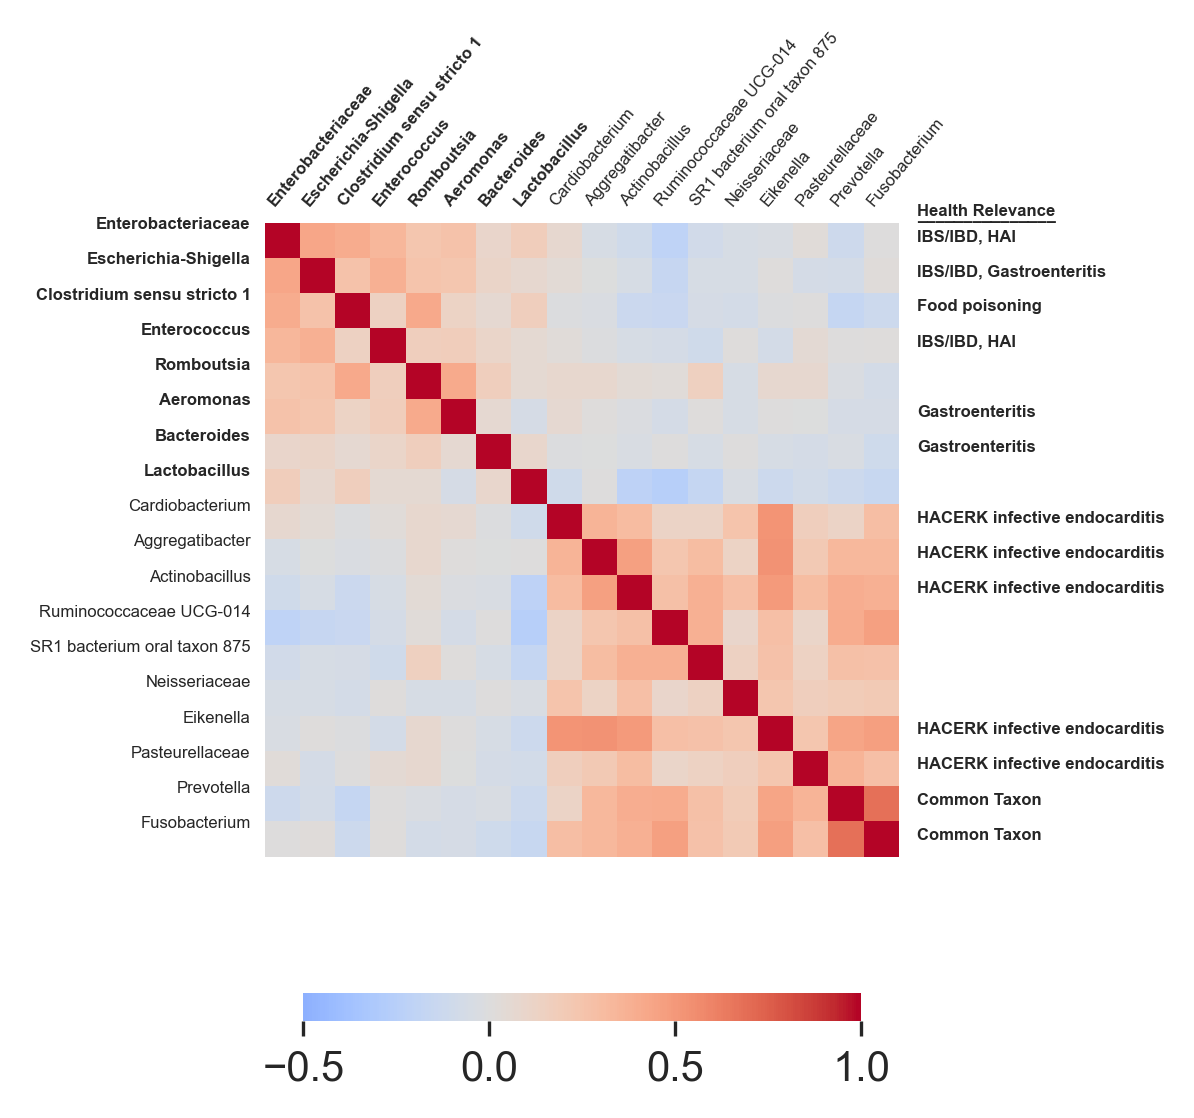

In [566]:
plt.figure(figsize=(8,4), dpi= 300)

#Plot heatmap
ax = sns.heatmap(correlation_list_list_df, cmap="coolwarm", vmax=1, vmin=-.5, center=0,square=True, cbar_kws= {'use_gridspec':False, 'location':'bottom', "shrink": .3})

#create list of labels
labels = [i[0:-3] for i in species_names]

#create list of labels that should be bolded
bold_labels = labels[0:8]

#adds labels to heatmap and removes tick marks
plt.xticks(ticks= range(0,18),labels=labels,horizontalalignment='left', rotation = 50, fontsize=4)
plt.yticks(ticks= range(0,18),labels=labels,rotation = 0, fontsize=4)
plt.tick_params(axis='both', which='both', length=0)

#sets each bolded species to bold for both the x and y axis on plot
for label in ax.get_xticklabels():
    if label.get_text() in bold_labels:
        label.set_weight('bold')

for label in ax.get_yticklabels():
    if label.get_text() in bold_labels:
        label.set_weight('bold')

#Health relevance text to the right of the heatmap
plt.text(18.5,-0.2, 'Health Relevance', fontsize='4', weight='bold')
plt.text(18.5,-.1, '_______________', fontsize='4', weight='bold')
plt.text(18.5,0.5, 'IBS/IBD, HAI', fontsize='4', weight='bold')
plt.text(18.5,1.5, 'IBS/IBD, Gastroenteritis', fontsize='4', weight='bold')
plt.text(18.5,2.5, 'Food poisoning', fontsize='4', weight='bold')
plt.text(18.5,3.5, 'IBS/IBD, HAI', fontsize='4', weight='bold')
plt.text(18.5,5.5, 'Gastroenteritis', fontsize='4', weight='bold')
plt.text(18.5,6.5, 'Gastroenteritis', fontsize='4', weight='bold')
plt.text(18.5,8.5, 'HACERK infective endocarditis', fontsize='4', weight='bold')
plt.text(18.5,9.5, 'HACERK infective endocarditis', fontsize='4', weight='bold')
plt.text(18.5,10.5, 'HACERK infective endocarditis', fontsize='4', weight='bold')
plt.text(18.5,14.5, 'HACERK infective endocarditis', fontsize='4', weight='bold')
plt.text(18.5,15.5, 'HACERK infective endocarditis', fontsize='4', weight='bold')
plt.text(18.5,16.5, 'Common Taxon', fontsize='4', weight='bold')
plt.text(18.5,17.5, 'Common Taxon', fontsize='4', weight='bold')


plt.plot()

# PCR import data

In [567]:
pseudo_abs_data = pickle.load(open('pickle_files/pseudo_abs_sort_lod_list.pkl', 'rb'))
pseudo_abs_data_i4 = pseudo_abs_data[4]


# Prepare data and perform PCA

In [568]:
#standardize/scale data via logarithm of data
data_scaled =  np.log10(pseudo_abs_data_i4)

#PCA
pca = PCA()
pca_data = pca.fit_transform(data_scaled)

naming_list = [f'PC {i+1}' for i in range(len(pca_data))]
pca_data_df = pd.DataFrame(pca_data, columns=naming_list)

# Link associated metadata and prepare for plotting

In [569]:
#need to add labels and color/style to PC1/PC2
metadata = pickle.load(open('pickle_files/metadata_all.pkl', 'rb'))

#map if microbe is Sibo-related for each sample from the metadata
sibo_metadata = list(metadata['SIBO'])

pca_data_df['Sibo'] = sibo_metadata

#map if microbe is Lactobacillus for each sample from the metadata
lacto_metadata = list(metadata['Lacto'])

pca_data_df['Lacto'] = lacto_metadata

#map if microbe is both non-sibo and Lactobacillus genus for each sample from the metadata
non_sibo_lacto = []
counter = 0

for i in pca_data_df['Sibo']:
    if pca_data_df['Sibo'][counter] == 0 and pca_data_df['Lacto'][counter] == 1: #both non-sibo and Lactobacillus
        non_sibo_lacto.append(1)
    else:
        non_sibo_lacto.append(0)

    counter += 1

pca_data_df['NonSibo_lacto'] = non_sibo_lacto

#show resulitng components (including added metadata in final columns)
pca_data_df

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 244,PC 245,PC 246,PC 247,PC 248,PC 249,PC 250,Sibo,Lacto,NonSibo_lacto
0,10.932868,-5.117875,4.706555,2.650149,0.440628,-1.336510,1.187388,1.579555,-0.182635,-1.464628,...,-2.051006e-24,-5.938551e-25,4.783325e-25,-2.352646e-26,-8.188706e-27,5.750352e-28,1.151528e-15,0,0,0
1,19.432810,-2.415029,-1.329387,1.507704,-3.045104,2.685819,-0.641785,0.200050,2.242544,-0.508504,...,-5.501317e-17,1.762717e-16,2.914697e-16,3.848017e-17,2.447125e-17,7.337551e-18,5.061924e-15,0,0,0
2,5.950523,10.894368,0.999400,-0.522979,0.134775,2.293759,3.867849,-0.176228,-0.769153,0.401781,...,-1.223996e-16,3.185534e-17,1.941206e-16,-1.398898e-15,1.195553e-15,4.830221e-16,1.381861e-15,1,0,0
3,-11.004754,10.040523,2.236190,-0.173276,0.355684,-0.372771,3.336037,-1.269729,-3.172273,0.749017,...,-2.051012e-24,-5.938507e-25,4.783288e-25,-2.354162e-26,-8.199103e-27,5.734560e-28,1.151528e-15,1,1,0
4,2.631200,-2.098034,-4.401216,2.936960,1.694555,-4.435207,1.104915,2.330145,0.298080,3.567085,...,1.260105e-16,-3.279511e-17,-1.998474e-16,1.440167e-15,-1.230823e-15,-4.972717e-16,9.143991e-16,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,5.965482,-2.474704,2.171693,-2.078379,-2.915287,1.848148,-2.219777,-1.160872,1.493644,0.551214,...,-7.969248e-17,1.419812e-16,-2.445290e-15,2.685857e-15,1.124895e-15,1.591913e-15,1.583047e-15,0,0,0
246,-15.635751,0.388212,-5.716319,0.309426,-2.299248,-1.684913,-1.704030,0.542871,-0.395548,-0.003291,...,-1.054169e-15,-3.464367e-15,-4.924045e-16,1.332647e-16,-1.640927e-15,3.201259e-15,1.743960e-15,0,0,0
247,-11.074547,-4.689529,0.616124,1.547861,0.184953,-2.755109,-0.175641,0.099764,-1.925628,-0.881446,...,-2.051009e-24,-5.938578e-25,4.783350e-25,-2.354031e-26,-8.180267e-27,5.847420e-28,1.151528e-15,0,0,0
248,3.486008,1.690770,-0.826294,-3.509435,7.718290,-6.303975,-1.642577,4.327458,-0.876406,0.798369,...,1.147116e-16,8.485128e-16,-7.872271e-16,1.537087e-15,1.494998e-15,-8.034630e-16,1.727591e-15,0,0,0


# Principal component analysis (PCA) of absolute microbial abundances at the genus level

C:\Users\ryany\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([], [])

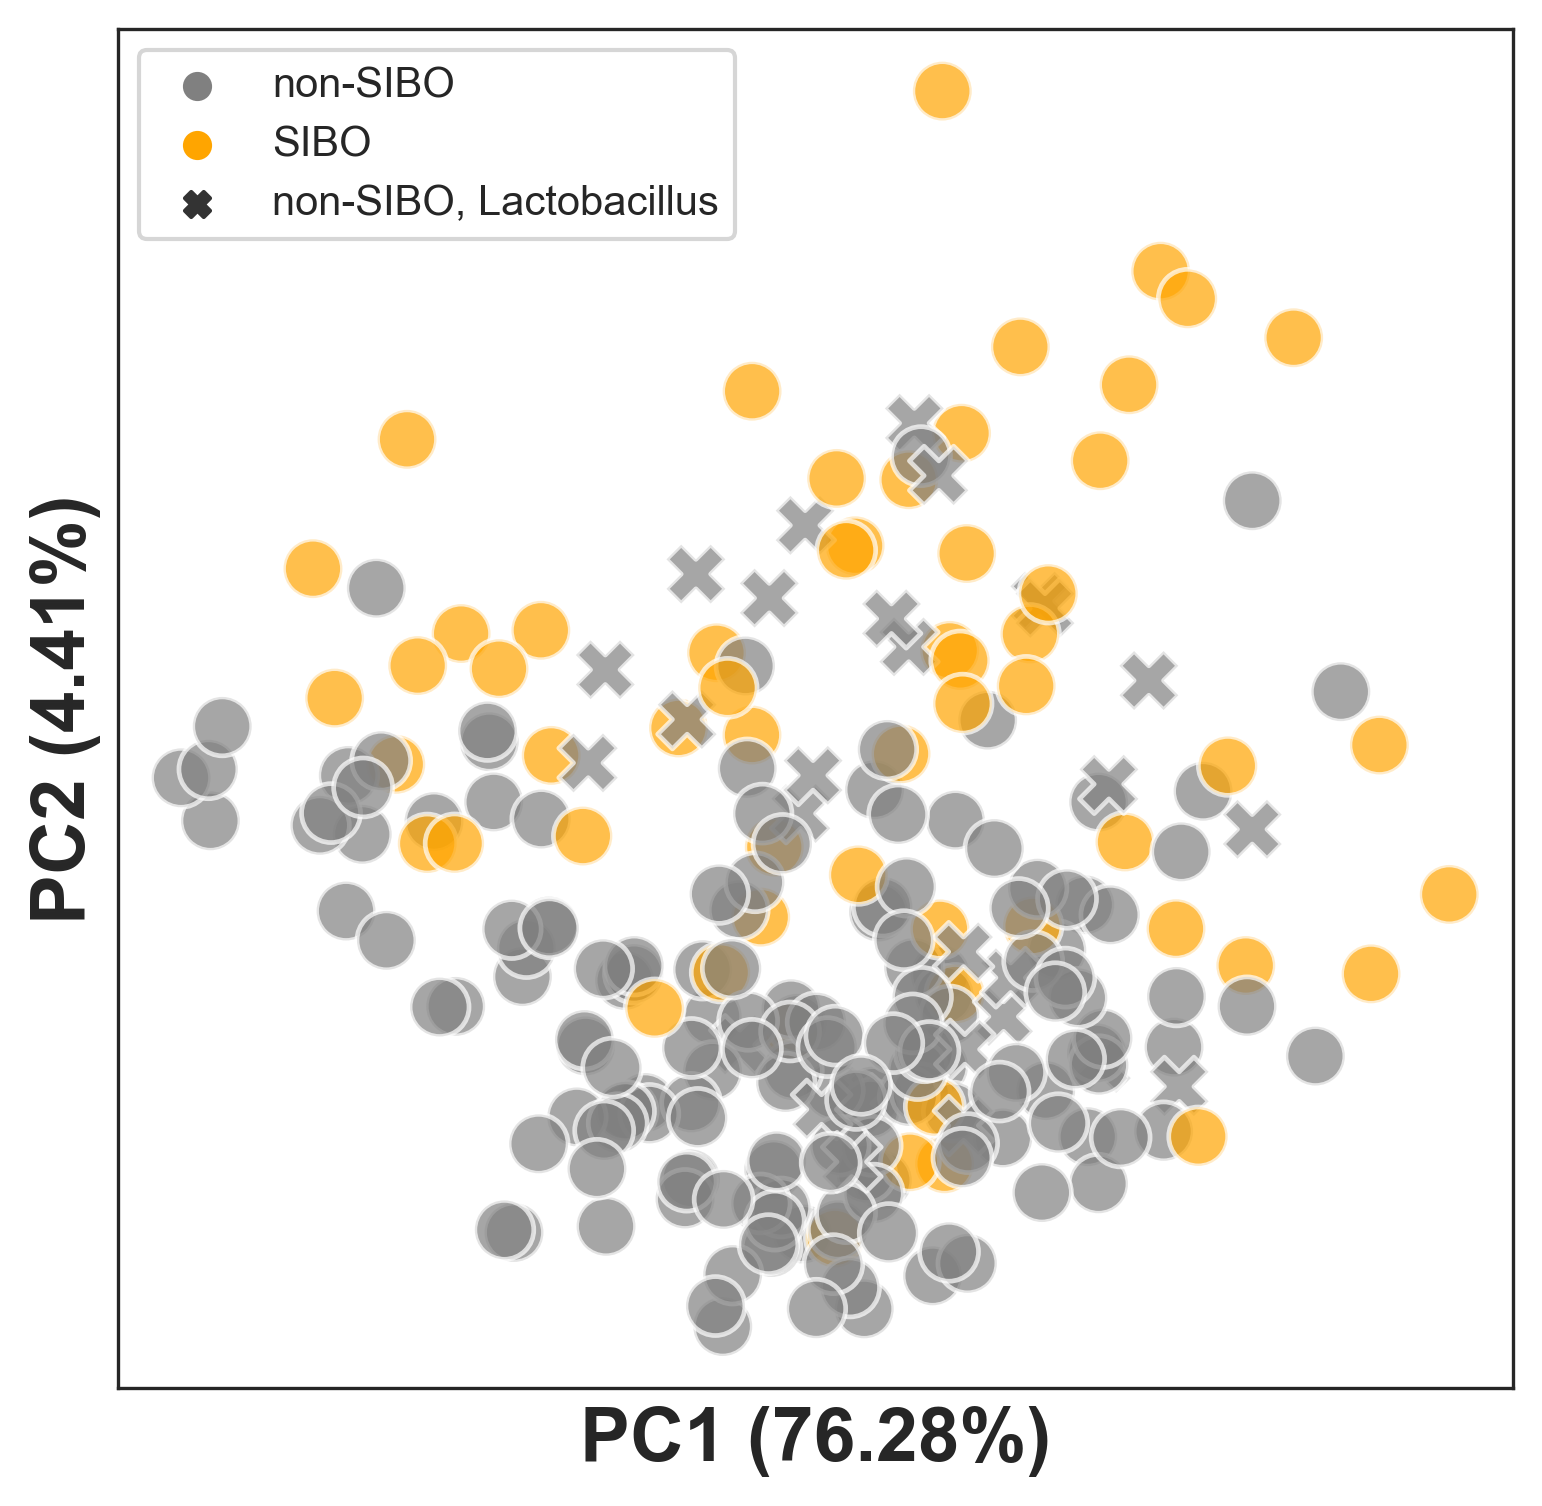

In [570]:
#PC 1 needs to be horizontally inverted
inverted_PC1 = pca_data_df['PC 1']*-1
var_explained = np.round((pca.explained_variance_ratio_ * 100),2)

plt.figure(figsize=(6,6), dpi= 300)
ax = sns.scatterplot(inverted_PC1,pca_data_df['PC 2'], hue=pca_data_df['Sibo'], style=pca_data_df['NonSibo_lacto'], s=200, palette=['grey', 'orange'], alpha  = 0.7)

#adds labels to heatmap and removes tick marks
plt.tick_params(axis='both', which='both', length=0)
plt.xlabel(f'PC1 ({var_explained[0]}%)', weight='bold',fontsize=18)
plt.ylabel(f'PC2 ({var_explained[1]}%)', weight='bold',fontsize=18)

handle = ax.get_legend_handles_labels()[0] #grabs color/shape for each label for legend

plt.legend(handle[1:3]+handle[5:], ['non-SIBO','SIBO', 'non-SIBO, Lactobacillus'])
plt.xticks([])
plt.yticks([])



PC1 axis correlates with total load and the PC2 axis correlates with the abundance of disruptor taxa.